In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from skimage.util import random_noise

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [22]:
x_train_noisy = random_noise(x_train, mode='gaussian', var=0.2)
x_test_noisy = random_noise(x_test, mode='gaussian', var=0.2)

In [23]:
input_img = Input(shape=(28, 28, 1))

In [24]:
encode = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encode = MaxPooling2D((2, 2), padding='same')(encode)
encode = Conv2D(64, (3, 3), activation='relu', padding='same')(encode)
encoded = MaxPooling2D((2, 2), padding='same')(encode)

In [25]:
decode = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(32, (3, 3), activation='relu', padding='same')(decode)
decode = UpSampling2D((2, 2))(decode)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decode)

In [26]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [28]:
#history = autoencoder.fit(x_train_noisy, x_train,epochs=50,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test))
history = autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 173s 737ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 2/5
235/235 [==============================] - 173s 735ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/5
235/235 [==============================] - 172s 731ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/5
235/235 [==============================] - 172s 733ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/5
235/235 [==============================] - 169s 718ms/step - loss: 0.1120 - val_loss: 0.1140


In [29]:
test_loss = autoencoder.evaluate(x_test_noisy, x_test)
print("Test Loss:", test_loss)

313/313 [==============================] - 8s 26ms/step - loss: 0.1140
Test Loss: 0.11395805329084396


In [30]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 9s 27ms/step


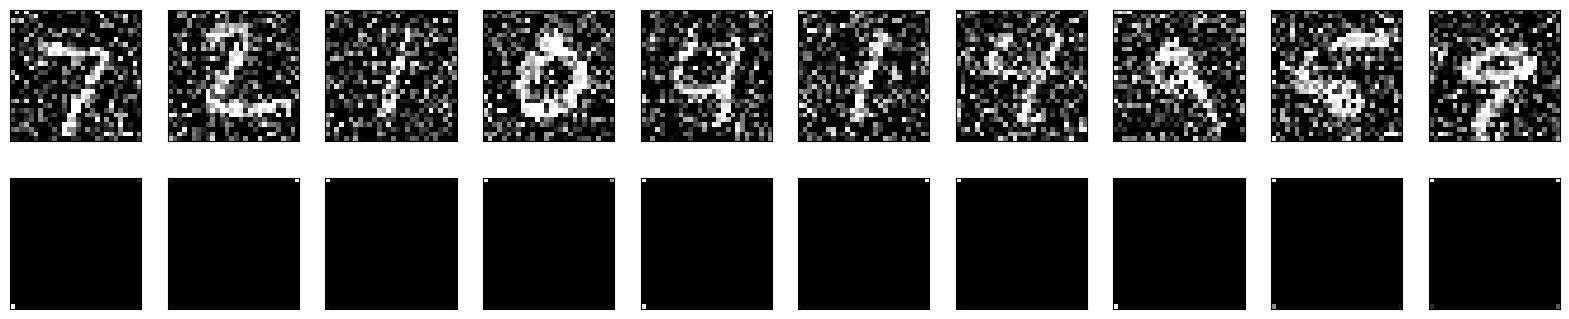

In [31]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed clean images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

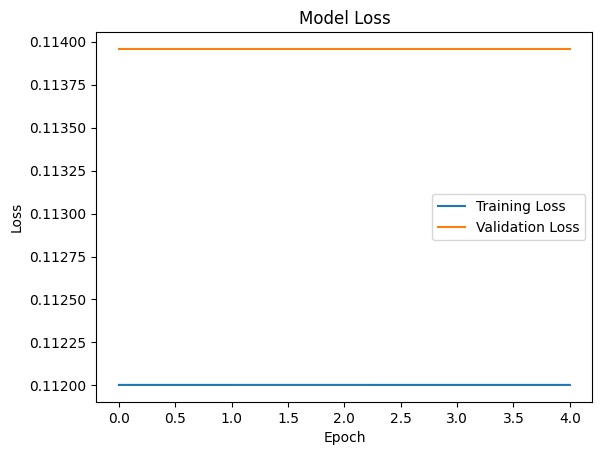

In [32]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()